# Summer 2021 Trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
stock=pd.read_csv('all_stock.csv')
bid=pd.read_csv('all_bid.csv')

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
stock['submitted_date']=pd.to_datetime(stock['submitted_date'])
bid['bid_placed_on']=pd.to_datetime(bid['bid_placed_on'])

In [8]:
sum_s=stock.loc[(stock['submitted_date']>datetime.datetime(2021,3,1))&(stock['submitted_date']<datetime.datetime(2021,6,1))]
sum_b=bid.loc[(bid['bid_placed_on']>datetime.datetime(2021,3,1))&(bid['bid_placed_on']<datetime.datetime(2021,6,1))]

In [9]:
sum_s['title']=sum_s['title'].str.lower()

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
top_5stock=list(sum_s['brand_name'].value_counts()[:5].index)
top_5bid=list(sum_b['brand_name'].value_counts()[:5].index)

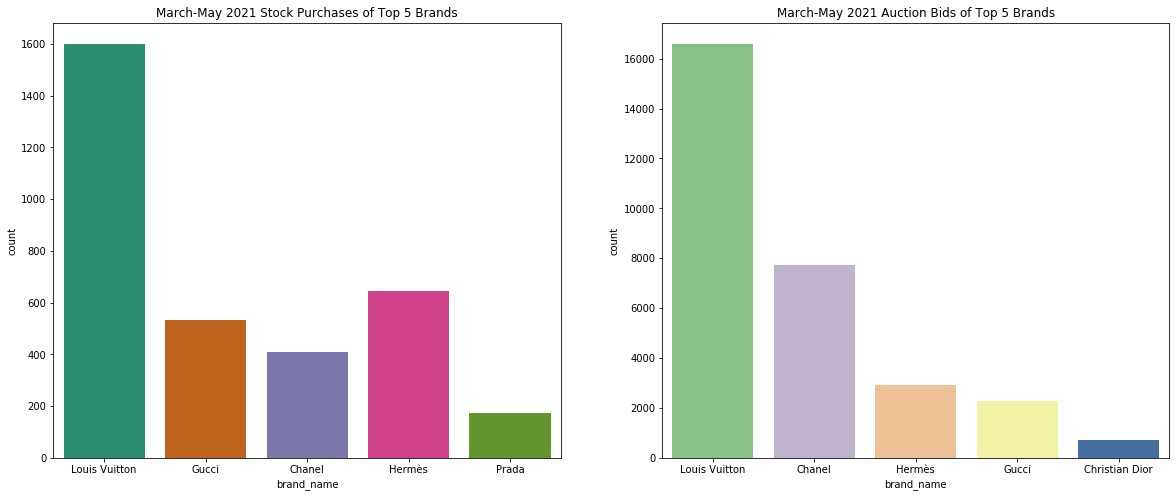

In [11]:
fig,axes=plt.subplots(1,2, figsize=(20,8))
sns.countplot(x='brand_name', data=sum_s[sum_s['brand_name'].isin(top_5stock)],
             order=['Louis Vuitton', 'Gucci', 'Chanel', 'Hermès', 'Prada'], palette='Dark2',
              ax=axes[0]).set(title='March-May 2021 Stock Purchases of Top 5 Brands')
sns.countplot(x='brand_name', data=sum_b[sum_b['brand_name'].isin(top_5bid)],
             order=['Louis Vuitton', 'Chanel', 'Hermès', 'Gucci', 'Christian Dior'], palette='Accent',
              ax=axes[1]).set(title='March-May 2021 Auction Bids of Top 5 Brands')
plt.show()

In [19]:
sum_s['seller'].value_counts().rename('item_count')[:10].reset_index().rename(columns={'index':'seller'})

,seller,item_count
0,Next Innovation,1123
1,BrandOff,390
2,camille+eLady_frontend,387
3,camille+glt,376
4,camille+vtt,331
5,camille+brandear,204
6,jeannette+dct-ep,186
7,RS_JapanWholesale,151
8,Camille+brandstreetTokyo,117
9,BrandJFA_WS,97


In [73]:
sum_s['title']=sum_s['title'].str.lower()
sum_b['title']=sum_b['title'].str.lower()

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
lv=sum_s.loc[sum_s['brand_name']=='Louis Vuitton']
lv.loc[lv['title'].str.contains('neverfull'), 'style']='neverfull'
lv.loc[lv['title'].str.contains('speedy'), 'style']='speedy'
lv.loc[lv['title'].str.contains('alma'), 'style']='alma'
lv.loc[lv['title'].str.contains('pochette'), 'style']='pochette'
lv.loc[lv['title'].str.contains('pochette'), 'style']='keepall'

lv.head()

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date,style
7614,Camille+brandstreetTokyo,206687,season 2 consign,214028,2371323,louis vuitton monogram agenda pm day planner c...,Louis Vuitton,Small Accessories,132.0,2021-03-01 15:27:00,NaN
7615,camille+glt,199623,season 2 consign,214028,2371240,"louis vuitton speedy 30, epi",Louis Vuitton,Top Handles & Satchels,533.0,2021-03-01 15:27:00,speedy
7616,camille+glt,199623,season 2 consign,214028,2371131,louis vuitton speedy 25 epi,Louis Vuitton,Top Handles & Satchels,565.0,2021-03-01 15:27:00,speedy
7617,camille+glt,199623,everything but the house,216378,2371171,"louis vuitton musette gm, monogram canvas",Louis Vuitton,Shoulder Bags,544.0,2021-03-01 16:47:00,NaN
7626,Camille+brandstreetTokyo,206687,the realreal,200963,2371300,louis vuitton monogram mat houston hand bag no...,Louis Vuitton,Top Handles & Satchels,526.0,2021-03-01 18:21:00,NaN


In [49]:
nv=lv.loc[lv['title'].str.contains('neverfull')]
sp=lv.loc[lv['title'].str.contains('speedy')]
al=lv.loc[lv['title'].str.contains('alma')]
po=lv.loc[lv['title'].str.contains('pochette')]
ke=lv.loc[lv['title'].str.contains('keepall')]

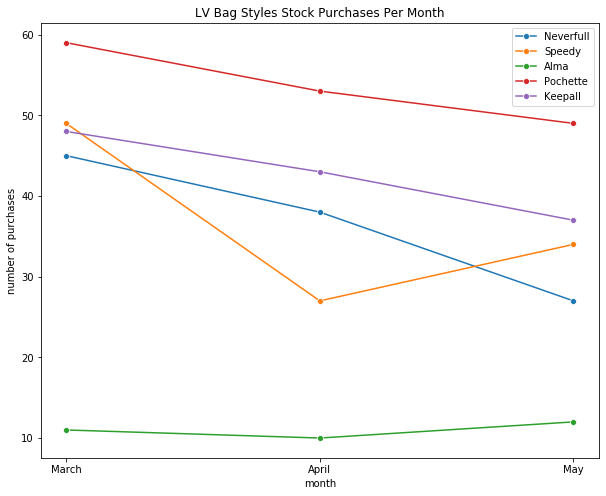

In [60]:
plt.figure(figsize=(10,8))
ax=sns.lineplot(x=nv['submitted_date'].dt.month.unique(),
                y=list(nv.groupby(nv['submitted_date'].dt.month)['price'].count()), marker='o',
               label='Neverfull')
ax=sns.lineplot(x=sp['submitted_date'].dt.month.unique(),
                y=list(sp.groupby(sp['submitted_date'].dt.month)['price'].count()), marker='o',
               label='Speedy')
ax=sns.lineplot(x=al['submitted_date'].dt.month.unique(),
                y=list(al.groupby(al['submitted_date'].dt.month)['price'].count()), marker='o',
               label='Alma')
ax=sns.lineplot(x=po['submitted_date'].dt.month.unique(),
                y=list(po.groupby(po['submitted_date'].dt.month)['price'].count()), marker='o',
               label='Pochette')
ax=sns.lineplot(x=ke['submitted_date'].dt.month.unique(),
                y=list(ke.groupby(ke['submitted_date'].dt.month)['price'].count()), marker='o',
               label='Keepall')
plt.title('LV Bag Styles Stock Purchases Per Month')
plt.ylabel('number of purchases')
plt.xlabel('month')
ax.set_xticks(range(3,6))
ax.set_xticklabels(['March', 'April', 'May'])
plt.show()

In [61]:
sp['price'].mean()

571.1090909090909

In [62]:
po['price'].mean()

418.90683229813664

In [75]:
baguette=sum_b.dropna(subset=['title'])
baguette=baguette[baguette['title'].str.contains('baguette')]

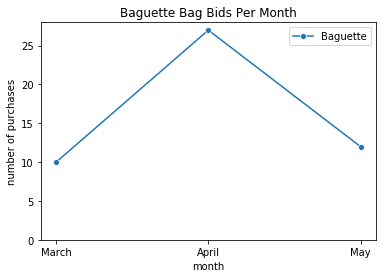

In [78]:
ax=sns.lineplot(x=baguette['bid_placed_on'].dt.month.unique(),
                y=list(baguette.groupby(baguette['bid_placed_on'].dt.month)['bid'].count()), marker='o',
               label='Baguette')
plt.title('Baguette Bag Bids Per Month')
plt.ylabel('number of purchases')
plt.xlabel('month')
ax.set_xticks(range(3,6))
ax.set_xticklabels(['March', 'April', 'May'])
plt.ylim(0,28)
plt.show()

In [83]:
sum_b[sum_b['brand_name']!='Louis Vuitton']['title'].value_counts()[:20].reset_index().rename(columns={'index':'title', 'title':'bid_count'})

,title,bid_count
0,chanel earrings,121
1,chanel quilted bag shoulder bag,77
2,chanel necklace,66
3,chanel cc rhinestone necklace,61
4,chanel sunglasses,51
5,hermès other line accessories / scarves,49
6,chanel cc earrings,44
7,chanel other lines precious metals and earrings,42
8,gucci gg canvas (bag) / shoulder bag,41
9,gucci other line bags / shoulder,37


In [84]:
sum_s[sum_s['brand_name']!='Louis Vuitton']['title'].value_counts()[:20].reset_index().rename(columns={'index':'title', 'title':'bid_count'})

,title,bid_count
0,hermes scarf blue,18
1,hermes scarf red,12
2,hermes scarf navy,11
3,hermes scarf black,11
4,hermes scarf pink,11
5,prada nylon backpack black,10
6,prada nylon shoulder bag black,10
7,prada nylon handbag black,10
8,"hermes brides de gala - hugo grygkar, carre 90",10
9,"gucci boat pochette, gg canvas",9
